<a href="https://colab.research.google.com/github/San13deep/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/Capstone_4_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
---

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.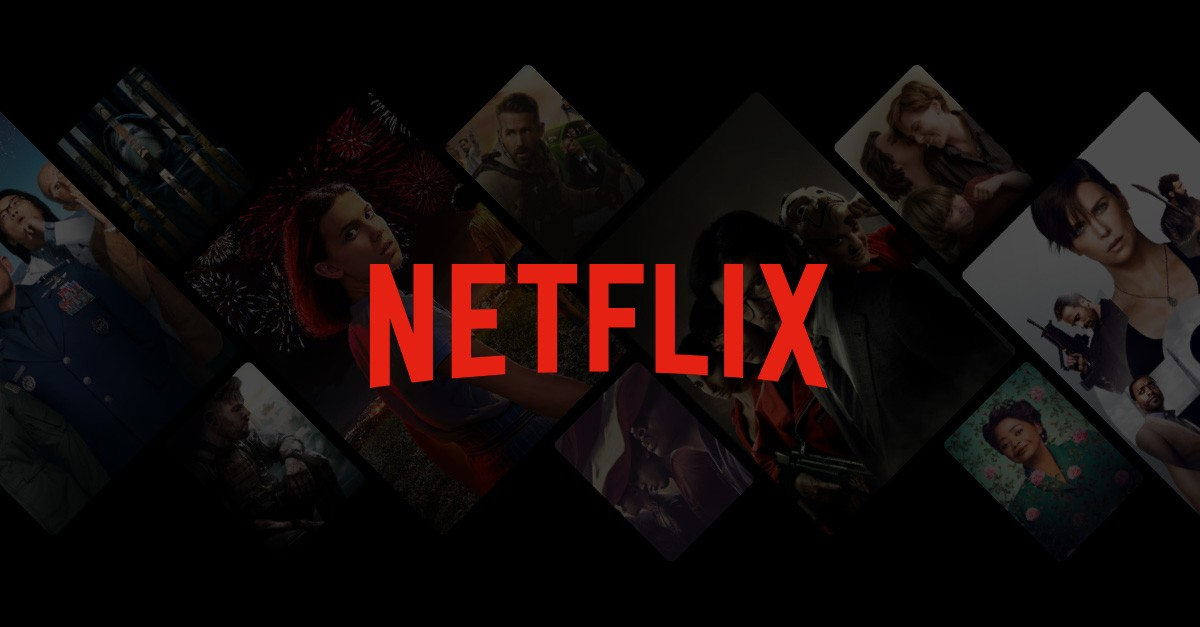

# **In this project, we are required to do**
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.

4. Clustering similar content by matching text-based features

# **Attribute Information**

* ***Show_id*** : Unique ID for every Movie / Tv Show

* ***Type*** : Identifier - A Movie or TV Show

* ***Title*** : Title of the Movie / Tv Show

* ***Director***  : Director of the Movie

* ***Cast*** : Actors involved in the movie / show

* ***Country*** : Country where the movie / show was produced

* ***Date_added*** : Date it was added on Netflix

* ***Release_year*** : Actual Releaseyear of the movie / show

* ***Rating*** : TV Rating of the movie / show

* ***Duration*** : Total Duration - in minutes or number of seasons

* ***Listed_in*** : Genere

* ***Description***: The Summary description


## **Importing Libraries**

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import pylab as pl
import spacy
import sklearn
import en_core_web_sm

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet
!pip install nltk
import nltk 
!python3 -c "import nltk; nltk.download('all')"

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import TruncatedSVD

#stop-words
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler


# Importing libraries for clustering
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

In [7]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.9 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=a42898395c59ef36b50a642d46b44bb19f1898129ef4b159fd5d6c7a13a08e3e
  Stored in directory: /tmp/pip-ephem-wheel-cache-86wxcnk1/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


# **Loading the Dataset**
There is a total of **7787** movies / TV shows in this data set collected from **AlmaBetter**

Each row contains the following information: **type** (Movie or TV Show), **title, director, cast, country, rating** (ex. PG, PG-13, R, etc.), **listed_in** (genre), and **plot description**.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
netflix = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/ NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv').drop(['show_id','date_added','release_year','duration'], axis=1)
netflix_df = netflix.copy()
netflix_df.head()

,type,title,director,cast,country,rating,listed_in,description
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,PG-13,Dramas,A brilliant group of students become card-coun...


# **Natural Language Processing (NLP) Model**

For the NLP portion of this project, I will first convert all plot descriptions to word vectors so they can be processed by the NLP model. Then, the similarity between all word vectors will be calculated using cosine similarity (measures the angle between two vectors, resulting in a score between -1 and 1, corresponding to complete oppositses or perfectly similar vectors). Finally, I will extract the 5 movies or TV shows with the most similar plot description to a given movie or TV show.

In [10]:
!pip install matplotlib-venn
import en_core_web_lg
nlp = en_core_web_lg.load()

In [11]:
# Load the large model to get the vectors
!nlp = spacy.load('en_core_web_lg')

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `nlp = spacy.load('en_core_web_lg')'


In [12]:
# Create word vectors for all movie and TV show descriptions
with nlp.disable_pipes():
    vectors = np.array([nlp(film.description).vector for idx, film in netflix_df.iterrows()])

In [13]:
# Function to analyze how similar two word vectors are
def cosine_similarity(a, b):
    return np.dot(a, b)/np.sqrt(a.dot(a)*b.dot(b))

In [14]:
# Calculate the mean for all word vectors
vec_mean = vectors.mean(axis=0)

# Subtract the mean from the vectors
centered = vectors - vec_mean 

In [15]:
# Function to get the indices of the five most similar descriptions
def get_similar_description_indices(description_vec):
    
    # Calculate similarities between given description and other descriptions in the dataset
    sims = np.array([cosine_similarity(description_vec - vec_mean, vec) for vec in centered])
    
    # Get the indices of the five most similar descriptions
    most_similar_index = np.argsort(sims)[-6:-1]
    
    return most_similar_index

In [16]:
# Create array of lists containing indices of five most similar descriptions
similar_indices = np.array([get_similar_description_indices(vec) for vec in vectors])

# **Test NLP Model**
To test my NLP model, I will look at the most similar plot descriptions to one of my favourite movies, Catch Me If You Can, directed by Steven Spielberg and starring Leonardo DiCaprio and Tom Hanks.

In [17]:
test_index = netflix.index[netflix.title == "Catch Me If You Can"][0]

print("Chosen Movie/TV Show")
print(netflix_df.title[test_index] + ': ' + netflix_df.description[test_index] + '\n')
print("Top Recommendations")
print(netflix_df.title[similar_indices[test_index][4]] + ': ' + netflix_df.description[similar_indices[test_index][4]] + '\n')
print(netflix_df.title[similar_indices[test_index][3]] + ': ' + netflix_df.description[similar_indices[test_index][3]] + '\n')
print(netflix_df.title[similar_indices[test_index][2]] + ': ' + netflix_df.description[similar_indices[test_index][2]] + '\n')
print(netflix_df.title[similar_indices[test_index][1]] + ': ' + netflix_df.description[similar_indices[test_index][1]] + '\n')
print(netflix_df.title[similar_indices[test_index][0]] + ': ' + netflix_df.description[similar_indices[test_index][0]] + '\n')

Chosen Movie/TV Show
Catch Me If You Can: An FBI agent makes it his mission to put cunning con man Frank Abagnale Jr. behind bars. But Frank not only eludes capture, he revels in the pursuit.

Top Recommendations
MI-5: When a terrorist escapes custody, MI-5 director Harry Pearce becomes the scapegoat. But the wily veteran still has some spycraft tricks up his sleeve.

The Blacklist: After turning himself in, a brilliant fugitive offers to help the FBI bag other baddies, but only if rookie profiler Elizabeth Keen is his partner.

The Bounty Hunter: Bounty hunter Milo Boyd finds his latest assignment downright satisfying as he learns that the bail-jumper he must chase down is his ex-wife, Nicole.

War: When his partner is killed and all clues point to a notorious assassin, FBI agent Jack Crawford sets out for revenge in this taut action-thriller.

Donnie Brasco: When FBI agent Joe Pistone goes undercover to infiltrate the mob, he starts to identify with the made men he's charged with tak

As you can see, my NLP model detected a lot of similar key words like 'FBI' from the descriptions. The descriptions also appear to be semantically related as they all appear to be related to crime.


# **K-Means Clustering Model**
Prior to creating the k-means clustering model, I will perform the following data cleaning and feature engineering tasks:

* Fill missing values with most common 
entry for the column (ex. fill missing country entries as 'United States').
* Convert columns with multiple values in a cell to a list and only take the first value (ex. take only the lead actor or actress from each cast list).
* Encode all categorical variables.

# **DATA CLEANING**


In [18]:
# Fill missing country entries with United States
netflix_df.fillna('Other', inplace=True)

# Change director, cast, country, and listed_in columns from type str to lists
netflix_df.director = netflix_df.director.str.split(', ').tolist()
netflix_df.cast = netflix_df.cast.str.split(', ').tolist()
netflix_df.country = netflix_df.country.str.split(', ').tolist()
netflix_df.listed_in = netflix_df.listed_in.str.split(', ').tolist()

# **Feature Reduction**

In [19]:
# Array of all unique directors, cast members, countries, ratings, and genres
all_directors = netflix_df['director'].explode().unique()
all_cast = netflix_df['cast'].explode().unique()
all_countries = netflix_df['country'].explode().unique()
all_ratings = netflix_df['rating'].unique()
all_genres = netflix_df['listed_in'].explode().unique()

len(all_directors), len(all_cast), len(all_countries), len(all_ratings),len(all_genres)

(4479, 32882, 122, 15, 42)

In [20]:

all_titles = netflix_df['title'].unique().tolist()
all_titles.sort()

There are 4479 directors, 32882 actors / actresses, and 122 countries in the data set which are too many features to include in a K-Means clustering model. Thus, I will reduce the number of features by only taking the primary director, lead actor/actress, and primary country for each movie or TV show. Then, I will count encode each of these features by replacing each categorical value with the number of times it appears in the dataset.

I will use one-hot encoding encoding to encode ratings and genres (listed_in) since there are only 15 ratings and 42 genres. One-hot-encoding creates new columns indicating the presence (1) or absence (0) of each possible value in the data. Since a movie or TV show can belong to more than one genre, I will use a Multi Label Binarizer for rating.

In [21]:
# Retain primary director, lead actor/actress, and primary country
for inx in range(len(netflix_df)):
    netflix_df['director'][inx] = netflix_df['director'][inx][0]
    netflix_df['cast'][inx] = netflix_df['cast'][inx][0]
    netflix_df['country'][inx] = netflix_df['country'][inx][0]
    inx += 1

In [22]:
feature_reduced_df = netflix_df.copy()
feature_reduced_df.head()

,type,title,director,cast,country,rating,listed_in,description
0,TV Show,3%,Other,João Miguel,Brazil,TV-MA,"[International TV Shows, TV Dramas, TV Sci-Fi ...",In a future where the elite inhabit an island ...
1,Movie,7:19,Jorge Michel Grau,Demián Bichir,Mexico,TV-MA,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Gilbert Chan,Tedd Chan,Singapore,R,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow..."
3,Movie,9,Shane Acker,Elijah Wood,United States,PG-13,"[Action & Adventure, Independent Movies, Sci-F...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,Robert Luketic,Jim Sturgess,United States,PG-13,[Dramas],A brilliant group of students become card-coun...


# **Feature Engineering (Categorical Encoding)**
<ul type="square">
<li> Use the MultiLabelBinarizer to encode the genres the movies or TV shows are listed in (each entry can belong to multiple genres).<li>
One-hot encode rating.<li>
Count encode the primary director, lead actor or actress, and country of each movie/TV show.
</ul>

In [23]:
# Create the MultiLabelBinarizer 
mlb = MultiLabelBinarizer()

# Encode each genre and join to dataframe
mlb_df = feature_reduced_df.join(pd.DataFrame(mlb.fit_transform(feature_reduced_df.pop('listed_in')),
                                              columns=mlb.classes_,
                                              index=feature_reduced_df.index))

In [24]:
# Apply one-hot encoder to rating column
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_rating = pd.DataFrame(OH_encoder.fit_transform(mlb_df[['rating']]), columns=all_ratings)

# One-hot encoding removed index; put it back
OH_rating.index = mlb_df.index

# Add one-hot encoded columns to data frame
mlb_df = mlb_df.join(OH_rating)

In [25]:
!pip install category_encoders

     |████████████████████████████████| 86 kB 4.5 MB/s 


In [26]:
import category_encoders as ce

# Create the count encoder
count_enc = ce.CountEncoder()

# Count encode director, cast, and country columns
count_encoded = count_enc.fit_transform(mlb_df[['director','cast','country']])

# Rename the columns with the _count suffix, and join to dataframe
netflix_encoded_df = mlb_df.join(count_encoded.add_suffix("_count"))

In [27]:
netflix_encoded_df = netflix_encoded_df.drop(['type','title','director','cast','country','rating','description'], axis=1)
netflix_encoded_df.head()

,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,Other,TV-Y7,PG,G,NC-17,TV-Y7-FV,UR,director_count,cast_count,country_count
0,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2389,1,79
1,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,2,123
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,28
3,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,2882
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,2882


# **Create (K-Means) Clusters**
I will create a k-means clustering model that will group the 7787 movies/TV shows into 500 clusters. After initializing the model, cluster predictions will be made and attached to the original data frame to show each movie/TV show and the cluster they belong to.

In [28]:
# Create K-Means Model
modelkmeans = KMeans(n_clusters=500, init='k-means++', n_init=10).fit(netflix_encoded_df)

# Form cluster predictions using K-Means Model
predictions = modelkmeans.predict(netflix_encoded_df)

# Convert cluster predictions to data frame
predictions_df = pd.DataFrame(predictions, columns=['cluster'])

# Attach cluster predictions to original data frame
netflix_pred = netflix.copy()
netflix_pred.insert(len(netflix.columns), column = 'cluster', value = predictions_df.cluster)

In [29]:
netflix_pred.head()

,type,title,director,cast,country,rating,listed_in,description,cluster
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,168
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,192
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",322
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",258
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,PG-13,Dramas,A brilliant group of students become card-coun...,472


# **Test K-Means Clustering Model**
I will test the k-means clustering model using one of my favourite TV shows, Breaking Bad.

In [30]:
# Get cluster number from given movie or TV show
cluster_num = netflix_pred[netflix_pred.title=='Breaking Bad'].cluster.item()

# View cluster the movie or TV show belongs to
netflix[netflix_pred.cluster == cluster_num]

,type,title,director,cast,country,rating,listed_in,description
63,TV Show,13 Reasons Why,NaN,"Dylan Minnette, Katherine Langford, Kate Walsh...",United States,TV-MA,"Crime TV Shows, TV Dramas, TV Mysteries","After a teenage girl's perplexing suicide, a c..."
64,TV Show,13 Reasons Why: Beyond the Reasons,NaN,"Dylan Minnette, Katherine Langford, Kate Walsh...",United States,TV-MA,"Crime TV Shows, Docuseries","Cast members, writers, producers and mental he..."
543,TV Show,Another Life,NaN,"Katee Sackhoff, Justin Chatwin, Samuel Anderso...",United States,TV-MA,"TV Action & Adventure, TV Dramas, TV Mysteries","After a massive alien artifact lands on Earth,..."
565,TV Show,Aquarius,NaN,"David Duchovny, Gethin Anthony, Grey Damon, Em...",United States,TV-MA,"Crime TV Shows, TV Dramas","Amid the turmoil of 1960s LA, two cops and a p..."
761,TV Show,Bates Motel,NaN,"Vera Farmiga, Freddie Highmore, Max Thieriot, ...",United States,TV-MA,"Crime TV Shows, TV Dramas, TV Horror","When his father dies, Norman Bates and his mot..."
1089,TV Show,Breaking Bad,NaN,"Bryan Cranston, Aaron Paul, Anna Gunn, Dean No...",United States,TV-MA,"Crime TV Shows, TV Dramas, TV Thrillers",A high school chemistry teacher dying of cance...
1584,TV Show,Damnation,NaN,"Logan Marshall-Green, Killian Scott, Sarah Jon...",United States,TV-MA,"Crime TV Shows, TV Dramas","During the Great Depression, a stranger with a..."
1608,TV Show,Dare Me,NaN,"Willa Fitzgerald, Herizen Guardiola, Marlo Kel...",United States,TV-MA,"Crime TV Shows, TV Dramas, TV Thrillers",Relationships topple and loyalties flip when a...
1731,TV Show,Dexter,NaN,"Michael C. Hall, Jennifer Carpenter, David Zay...",United States,TV-MA,"Crime TV Shows, TV Dramas, TV Mysteries","By day, mild-mannered Dexter is a blood-spatte..."
2457,TV Show,Godless,NaN,"Jeff Daniels, Michelle Dockery, Jack O'Connell...",United States,TV-MA,TV Dramas,A ruthless outlaw terrorizes the West in searc...


As you can see, this cluster primarily contains American Crime TV Shows and TV Dramas.

# **Flask App**
Finally, I will create a Flask app that will allow users to input a movie or TV show and will provide recommendations based on the director, lead actor/actress, genre, and country it was produced in. Prior to creating the app, I will clean the data and reformat it.

In [31]:
# Retain top 3 actors/actresses of each film
netflix_cast3 = netflix.copy()
netflix_cast3.fillna('N/A', inplace=True)
netflix_cast3.cast = netflix_cast3.cast.str.split(', ').tolist()

for x in range(len(netflix_cast3)):
    netflix_cast3['cast'][x] = netflix_cast3['cast'][x][:3]
    x += 1
    
netflix_cast3['cast'] = netflix_cast3['cast'].agg(lambda x: ', '.join(map(str, x)))

In [32]:
# Drop unnecessary columns
drop_netflix = netflix_cast3.drop(['type','director','country','rating'], axis=1)

# Rename remaining columns
flix_df = drop_netflix.rename(columns={'title':'Title','listed_in':'Genre','cast':'Cast','description':'Description', 
                                       'cluster':'Group'})

flix_df

,Title,Cast,Genre,Description
0,3%,"João Miguel, Bianca Comparato, Michel Gomes","International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano","Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,23:59,"Tedd Chan, Stella Chung, Henley Hii","Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,9,"Elijah Wood, John C. Reilly, Jennifer Connelly","Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth",Dramas,A brilliant group of students become card-coun...
...,...,...,...,...
7782,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi","Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana","Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,Zulu Man in Japan,Nasty C,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo","International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [33]:
!pip install dash

     |████████████████████████████████| 9.6 MB 8.4 MB/s 
     |████████████████████████████████| 357 kB 45.9 MB/s 


In [34]:
!pip install jupyter-dash

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=0e766b32becbe7d064808ec6c8bf03f522514a932dca27d828586a402996a804
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [35]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
from dash import dash_table
from jupyter_dash import JupyterDash

In [36]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

# Create server variable with Flask server object for use with gunicorn
server = app.server

app.layout = html.Div(style={'backgroundColor': 'white'}, children = [
    html.H1("NetflixRecommender", style={'text-align': 'center', 
                                      'font-family':'trebuchet ms',
                                      'font-size':'60px',
                                      'color': 'rgb(229,9,20)',
                                      'backgroundColor': 'black',
                                      'padding':'1%',
                                      'box-shadow': '2px 5px 5px 1px rgba(255, 101, 131,0.5)'}), 
    html.H2("Favourite Movie/TV Show:", style={'text-align': 'left', 
                                               'font-family':'trebuchet ms',
                                               'font-size':'20px',
                                               'color': 'black',
                                               'padding':'1%'}),
    dcc.Dropdown(id="select_film",
                 options=[{"label": title, "value": title} for title in all_titles],
                 multi=False,
                 value="Breaking Bad",
                 style={'width': "50%", 
                        'font-size':'14px', 
                        'font-family':'trebuchet ms', 
                        'padding-left':'1%'}
                 ),
    html.Br(),
    html.Br(),
    html.H2("Recommendations", style={'text-align': 'center', 
                                       'font-family':'trebuchet ms',
                                       'font-size':'24px',
                                       'color': 'white',
                                       'backgroundColor': 'rgb(229,9,20)',
                                       'padding':'1%',
                                       'box-shadow': '2px 5px 5px 1px grey'}),
    html.Div(id='dd-output-container'),
    
])


@app.callback(
    dash.dependencies.Output('dd-output-container','children'),
    [dash.dependencies.Input('select_film','value')])

def update_output(value):
    return  dash_table.DataTable(
        id='table',
        columns=[{"name": i, "id": i} for i in flix_df.columns],
        data=flix_df[netflix_pred.cluster == netflix_pred[netflix_pred.title==value].cluster.item()].to_dict('records'),
        style_header={
                    'textAlign': 'left',
                    'backgroundColor': 'rgb(229,9,20)',
                    'color': 'white',
                    'fontWeight': 'bold',
                    'font-size':'14px',
                    'font-family':'trebuchet ms',
                    'padding':'1%'},
        style_cell={
                    'textAlign': 'left',
                    'backgroundColor': 'white', 
                    'color': 'black',
                    'font-size':'13px',
                    'font-family':'trebuchet ms',
                    'padding':'1%'},
        style_data={
                    'whiteSpace': 'normal',
                    'height': 'auto'},
        style_cell_conditional=[
            {'if': {'column_id': 'Title'},
             'width': '20%'},
            {'if': {'column_id': 'Cast'},
             'width': '20%'},
            {'if': {'column_id': 'Genre'},
             'width': '20%'},
             {'if': {'column_id': 'Description'},
             'width': '20%'},
        ]
    )
# Run dashboard app
app.run_server(debug=True, use_reloader=False)

Dash app running on:


<IPython.core.display.Javascript object>

In [37]:
Flix_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/ NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# **Exploratory Data Analysis (EDA)**

In [38]:
Flix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [39]:
Flix_df.shape

(7787, 12)

In [40]:
Flix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [41]:
Flix_df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [42]:
Flix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# **NULL VALUES**

In [43]:
Flix_df.isnull().sum()/Flix_df.shape[0]*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [44]:
Flix_df['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [45]:
Flix_df['country'].value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

**NULL VALUE TREATMENT**

1. RATING & COUNTRY - As rating column has 0.08% null values , so replacing nulls with mose frequent TV-MA rating and doing same thing with country column

2. CAST - cast column has too many different values and more than 9% are missing, so there is no need to keep it but we are keeping it to perform EDA

3. DATE - there are few missing values for date column. so, lets drop missing value rows.

4. DIRECTOR - Director column has more then 30% null values so dropping that column

In [46]:
Flix_df['rating'].replace(np.nan, 'TV-MA',inplace  = True)
Flix_df['country'].replace(np.nan, 'United States',inplace  = True)
Flix_df['cast'].replace(np.nan, 'missing info',inplace  = True)

Flix_df= Flix_df.drop(columns='director',axis=1)

In [47]:
flix_df.head()

,Title,Cast,Genre,Description
0,3%,"João Miguel, Bianca Comparato, Michel Gomes","International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano","Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,23:59,"Tedd Chan, Stella Chung, Henley Hii","Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,9,"Elijah Wood, John C. Reilly, Jennifer Connelly","Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth",Dramas,A brilliant group of students become card-coun...


In [48]:
Flix_df = Flix_df[Flix_df['date_added'].notna()]

In [49]:
Flix_df.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [50]:
# add new features
Flix_df["date_added"] = pd.to_datetime(Flix_df['date_added'])
Flix_df['year_added'] = Flix_df['date_added'].dt.year
Flix_df['month_added'] = Flix_df['date_added'].dt.month

# **Analyze the type of content available on Netflix**

---



Analysis entire Netflix dataset consisting of both movies and shows. Let’s compare the total number of movies and shows in this dataset to know which one is the majority.

**Netflix Content By Type**

In [51]:
# ploting for pie chart on type feature
# import plotly.express as px
x = Flix_df['type'].value_counts().reset_index()
colors=['DodgerBlue','PaleTurquoise']
fig = px.pie(x,title='Type of Netflix Content',values='type',names='index',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
              marker=dict(colors=colors, line=dict(color='#000000', width=2)))


**Observations :-**

* It is evident that there are more movies on Netflix than TV shows.
* Netflix has 5377 movies, which is more than double the quantity of TV shows.
* There are about 70% movies and 30% TV shows on Netflix.

In [52]:
country = Flix_df['country'].value_counts().reset_index()
country = country[country['country'] /  country['country'].sum() > 0.01]

fig = px.pie(country, values='country', names='index',color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'darkred', width = 2)))
fig.show()

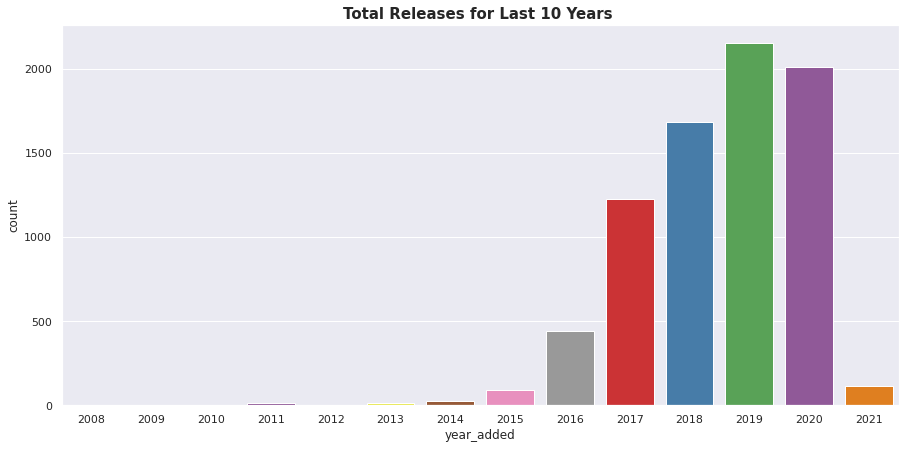

In [53]:
# Total release for last 10 years
sns.set(rc={'figure.figsize':(15,7)})
sns.countplot(x='year_added',data=Flix_df,palette="Set1")

plt.title('Total Releases for Last 10 Years ',size='15',fontweight="bold")    
plt.show()

**The number of release have significantly increased after 2015 and have dropped in 2021 becase of Covid 19**

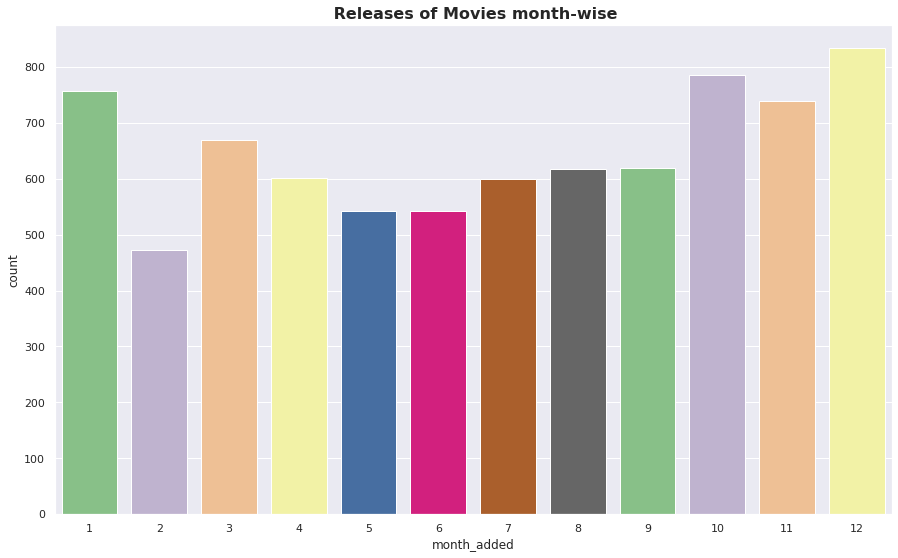

In [54]:
# Release of movies month-wise
sns.set(rc={'figure.figsize':(15,9)})
sns.countplot(x='month_added',data=Flix_df,palette="Accent")

plt.title(' Releases of Movies month-wise',size='16',fontweight="bold")    
plt.show()

**More of the content is released in holiday season - October, November, December and January**

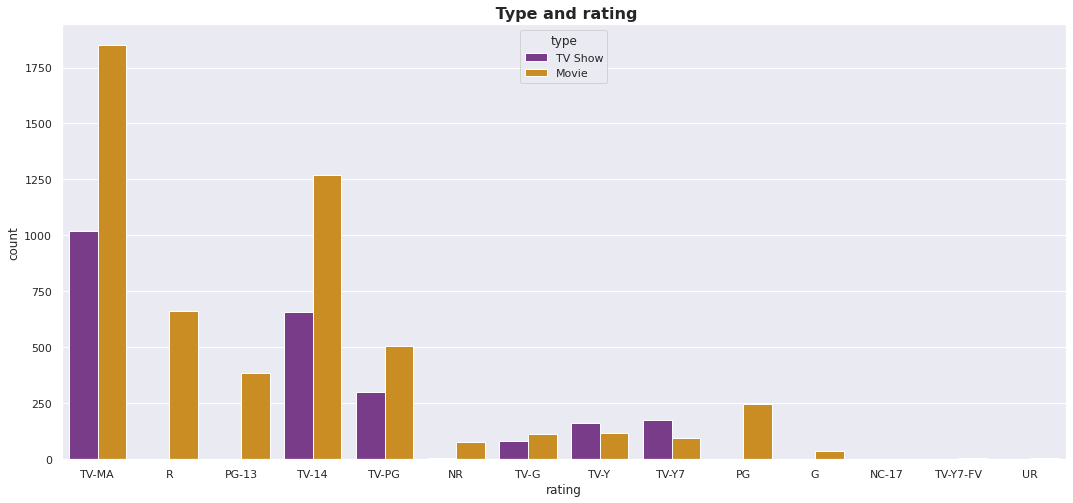

In [55]:
# Rating
plt.figure(figsize=(18,8))
sns.countplot(x='rating',hue='type',data=Flix_df,palette="CMRmap")
plt.title(' Type and rating',size='16',fontweight="bold")
plt.show()

**Top Genres on Netflix**

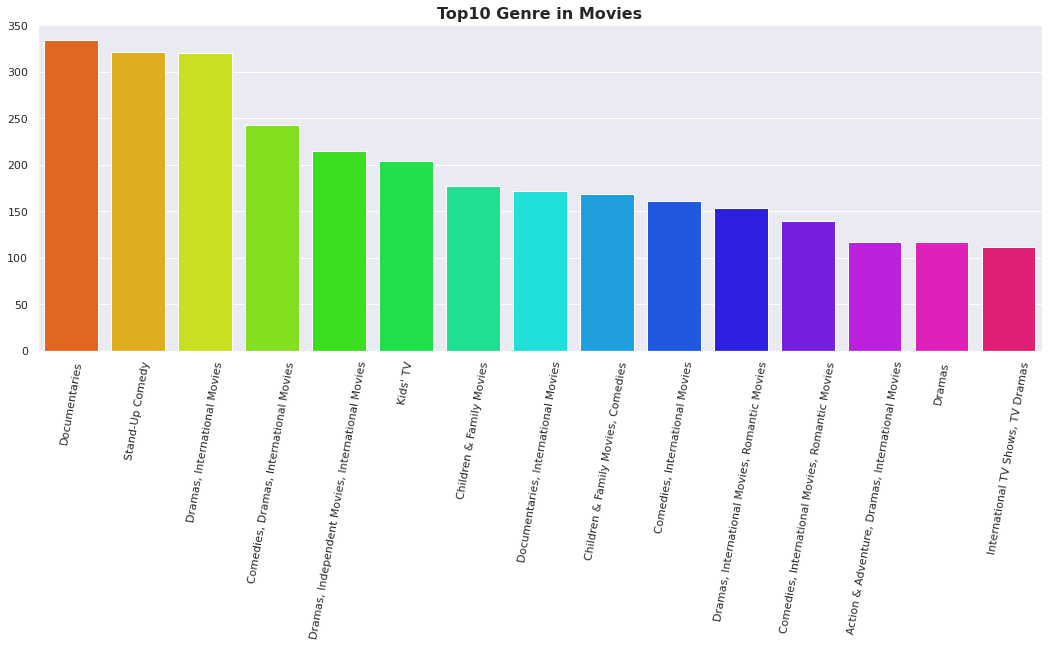

In [56]:
# Top 10 Genre in movies
plt.figure(figsize=(18,6))
sns.barplot(x = Flix_df["listed_in"].value_counts().head(15).index,
            y = Flix_df["listed_in"].value_counts().head(15).values,palette="hsv")
plt.xticks(rotation=80)
plt.title("Top10 Genre in Movies",size='16',fontweight="bold")
plt.show()

From the graph, we know that Documentaries take the first place, followed by Stand-up Comedy and Dramas,International Movies..

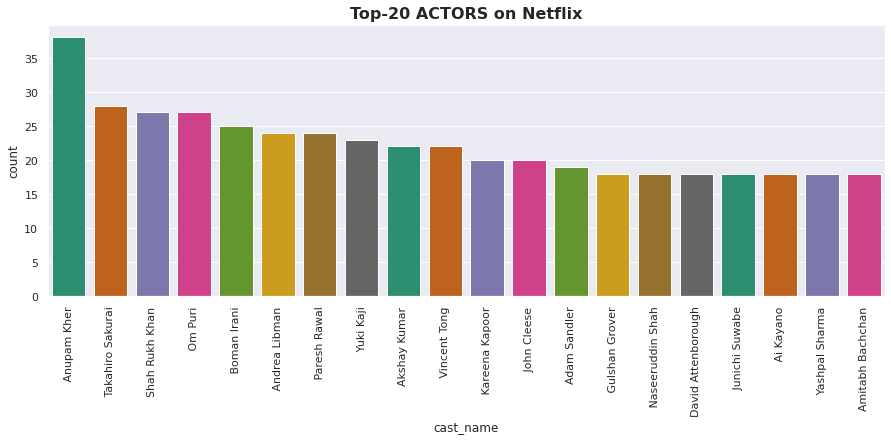

In [57]:
# Top 20 actors netflix
Flix_df['cast_name'] = Flix_df['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in Flix_df['cast_name']: cast_count += i
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]
plt.figure(figsize=(15,5))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="Dark2")
plt.title("Top-20 ACTORS on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

The top actor on Netflix Movies, based on the number of titles, is Anupam Kher.

In [58]:
Flix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   cast          7777 non-null   object        
 4   country       7777 non-null   object        
 5   date_added    7777 non-null   datetime64[ns]
 6   release_year  7777 non-null   int64         
 7   rating        7777 non-null   object        
 8   duration      7777 non-null   object        
 9   listed_in     7777 non-null   object        
 10  description   7777 non-null   object        
 11  year_added    7777 non-null   int64         
 12  month_added   7777 non-null   int64         
 13  cast_name     7777 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 1.1+ MB


In [59]:
Flix_df['duration']=Flix_df['duration'].str.replace('Season','')
Flix_df['duration']=Flix_df['duration'].str.replace('s','')
Flix_df['duration']=Flix_df['duration'].str.replace('min','')

Flix_df['duration']=Flix_df['duration'].astype(str).astype(int)
Flix_df['duration']

0         4
1        93
2        78
3        80
4       123
       ... 
7782     99
7783    111
7784     44
7785      1
7786     90
Name: duration, Length: 7777, dtype: int64

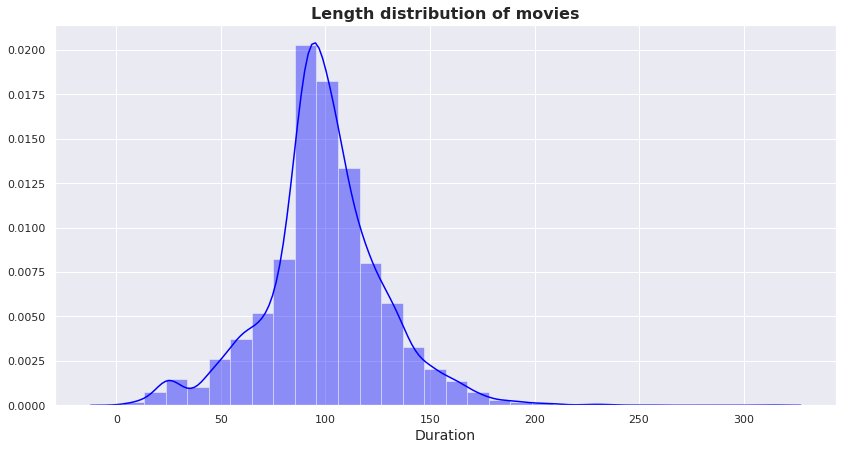

In [60]:
# Length distribution of movies
movie_df = Flix_df[Flix_df['type']=='Movie']

plt.figure(figsize=(14, 7))

sns.distplot(movie_df['duration'], bins=30,color='Blue').set(ylabel=None)

plt.title('Length distribution of movies', fontsize=16,fontweight="bold")
plt.xlabel('Duration', fontsize=14)
plt.show()

In [61]:
# Season-wise distribution of tv shows
tv_df = Flix_df[Flix_df['type']=='TV Show']
tv_df['duration'].value_counts()

tv=tv_df['duration'].value_counts().T.reset_index()

fig = px.pie(tv,values='duration',names='index',color_discrete_sequence=px.colors.sequential.Greens)
fig.update_layout(title="season-wise distribution of tv shows")
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker=dict( line=dict(color = 'RebeccaPurple', width=2)))

**LONGEST TV - SHOWS**

---



In [62]:
long_shows = tv_df[tv_df['duration']>9]
long_shows_df = long_shows[['title','duration']]
long_shows_df.sort_values(by=['duration'],ascending=False)

,title,duration
2538,Grey's Anatomy,16
4438,NCIS,15
5912,Supernatural,15
1471,COMEDIANS of the world,13
1537,Criminal Minds,12
7169,Trailer Park Boys,12
1300,Cheers,11
2678,Heartland,11
1577,Dad's Army,10
1597,Danger Mouse: Classic Collection,10


# **DATA CLEANING AND PREPROCESSING**

In [63]:
Flix_df.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'cast_name'],
      dtype='object')

In [64]:
movie_df.drop(columns=['show_id', 'title', 'cast', 'date_added', 'description', 'cast_name'],axis=1,inplace=True)

tv_df.drop(columns=['show_id', 'title', 'cast', 'date_added',
          'description', 'cast_name'],axis=1,inplace=True)

new_flix_df = Flix_df.drop(columns=['show_id', 'title', 'cast', 'date_added', 'description', 'cast_name'],axis=1)
# movie_df
new_flix_df

,type,country,release_year,rating,duration,listed_in,year_added,month_added
0,TV Show,Brazil,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020,8
1,Movie,Mexico,2016,TV-MA,93,"Dramas, International Movies",2016,12
2,Movie,Singapore,2011,R,78,"Horror Movies, International Movies",2018,12
3,Movie,United States,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",2017,11
4,Movie,United States,2008,PG-13,123,Dramas,2020,1
...,...,...,...,...,...,...,...,...
7782,Movie,"Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99,"Dramas, International Movies",2020,10
7783,Movie,India,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",2019,3
7784,Movie,United States,2019,TV-MA,44,"Documentaries, International Movies, Music & M...",2020,9
7785,TV Show,Australia,2019,TV-PG,1,"International TV Shows, Reality TV",2020,10


In [65]:
#from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_flix_df["type"] = le.fit_transform(new_flix_df["type"])
new_flix_df["country"] = le.fit_transform(new_flix_df["country"])

new_flix_df['rating'] = le.fit_transform(new_flix_df['rating'])
new_flix_df['listed_in'] = le.fit_transform(new_flix_df['listed_in'])

**Text Cleaning**

---



In [66]:
#combining genre and description column 
text_df = Flix_df['listed_in'] + Flix_df['description']
text_df

0       International TV Shows, TV Dramas, TV Sci-Fi &...
1       Dramas, International MoviesAfter a devastatin...
2       Horror Movies, International MoviesWhen an arm...
3       Action & Adventure, Independent Movies, Sci-Fi...
4       DramasA brilliant group of students become car...
                              ...                        
7782    Dramas, International MoviesWhen Lebanon's Civ...
7783    Dramas, International Movies, Music & Musicals...
7784    Documentaries, International Movies, Music & M...
7785    International TV Shows, Reality TVDessert wiza...
7786    Documentaries, Music & MusicalsThis documentar...
Length: 7777, dtype: object

In [67]:
#fuction for cleaning text
def clean_text(text):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(text)
    tokens=[le.lemmatize(w) for w in word_tokens if w not in STOPWORDS and len(w)>3]
    cleaned_text=" ".join(tokens)
    return cleaned_text

In [68]:
new_text_df = text_df.apply(clean_text)
new_text_df

0       International Shows Dramas Sci-Fi FantasyIn fu...
1       Dramas International MoviesAfter devastating e...
2       Horror Movies International MoviesWhen army re...
3       Action Adventure Independent Movies Sci-Fi Fan...
4       DramasA brilliant group student become card-co...
                              ...                        
7782    Dramas International MoviesWhen Lebanon Civil ...
7783    Dramas International Movies Music MusicalsA sc...
7784    Documentaries International Movies Music Music...
7785    International Shows Reality TVDessert wizard A...
7786    Documentaries Music MusicalsThis documentary d...
Length: 7777, dtype: object

**EXTRACTING THE FEATURES AND CREATING THE DOCUMENT-TERM-MATRIX ( DTM )**

1) LSA is generally implemented with Tfidf values everywhere and not with the Count Vectorizer.

2) max_features depends on your computing power and also on eval. metric (coherence score is a metric for topic model). Try the value that gives best eval. metric and doesn't limits processing power.

3) Default values for min_df & max_df worked well.

4) Can try different values for ngram_range.

In [69]:
vect =TfidfVectorizer(stop_words=STOPWORDS,max_features=1000)
vect_text=vect.fit_transform(new_text_df)
print(vect.get_feature_names())

['000', '10', '1970s', '1980s', 'ability', 'abuse', 'academy', 'accident', 'accidentally', 'account', 'accused', 'across', 'action', 'activist', 'actor', 'actress', 'adult', 'adventure', 'adventurea', 'affair', 'africa', 'african', 'aged', 'agent', 'aging', 'agrees', 'alien', 'along', 'also', 'always', 'ambition', 'ambitious', 'america', 'american', 'amid', 'among', 'ancient', 'angeles', 'animal', 'animated', 'anime', 'another', 'answer', 'anthology', 'anything', 'apart', 'apartment', 'army', 'around', 'arrives', 'art', 'artist', 'aspiring', 'assassin', 'athlete', 'attack', 'attempt', 'audience', 'avenge', 'away', 'baby', 'bachelor', 'back', 'band', 'bank', 'based', 'battle', 'bear', 'beautiful', 'beauty', 'become', 'becomes', 'becoming', 'befriends', 'begin', 'behind', 'belief', 'beloved', 'best', 'better', 'beyond', 'biggest', 'bill', 'biopic', 'birth', 'birthday', 'black', 'body', 'bollywood', 'bond', 'book', 'bos', 'boy', 'boyfriend', 'brave', 'break', 'bride', 'bring', 'brings', '

In [70]:
idf=vect.idf_
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)
# print(l)
print(l[0],l[-1])
print(dd['international'])
print(dd['bear']) 

international bear
1.7552031425318138
6.963322241161702


In [71]:
new_text_df.head()

0    International Shows Dramas Sci-Fi FantasyIn fu...
1    Dramas International MoviesAfter devastating e...
2    Horror Movies International MoviesWhen army re...
3    Action Adventure Independent Movies Sci-Fi Fan...
4    DramasA brilliant group student become card-co...
dtype: object

# **Topic Modeling**

### **1. LSA(Latent semantic analysis)**

Latent semantic analysis (LSA) is a technique in natural language processing, in particular distributional semantics, of analyzing relationships between a set of documents and the terms they contain by producing a set of concepts related to the documents and terms. LSA assumes that words that are close in meaning will occur in similar pieces of text

In [72]:
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)
print(lsa_top[0])
print(lsa_top.shape)

[ 0.20293519  0.06241254  0.09476091 -0.08713809 -0.06508088 -0.02441961
 -0.07393697 -0.03987938  0.1216865   0.05689153]
(7777, 10)


In [73]:
l=lsa_top[0]
print("NETFLIX TOPIC 0 :")
for i,topic in enumerate(l):
  print("NETFLIX Topic ",i," : ",topic*100)

NETFLIX TOPIC 0 :
NETFLIX Topic  0  :  20.293518652143167
NETFLIX Topic  1  :  6.241254183244821
NETFLIX Topic  2  :  9.476090568628704
NETFLIX Topic  3  :  -8.713808823563785
NETFLIX Topic  4  :  -6.508088221508112
NETFLIX Topic  5  :  -2.4419609590770617
NETFLIX Topic  6  :  -7.393697417978791
NETFLIX Topic  7  :  -3.987937729335128
NETFLIX Topic  8  :  12.16864957446164
NETFLIX Topic  9  :  5.689152703245175


**Similalry for other documents we can do this. However note that values don't add to 1 as in LSA it is not probabiltiy of a topic in a document.**

In [74]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(10, 1000)
[[ 0.00656765  0.00545324  0.00756655 ...  0.13097143  0.008755
   0.0057369 ]
 [ 0.00463957 -0.00387344  0.00036291 ... -0.0597857  -0.00522815
   0.00116565]
 [ 0.00358206  0.00043861  0.00152986 ... -0.04092356 -0.00215488
   0.00068989]
 ...
 [ 0.0032807   0.00438    -0.00305445 ...  0.0173375  -0.00310734
   0.00369738]
 [ 0.00831187 -0.00264949 -0.00792638 ... -0.0038689  -0.00092768
  -0.00365867]
 [ 0.00871115 -0.00352474  0.00177444 ...  0.22019193 -0.00048612
  -0.00434304]]


**TOP-10 TOPICS ON NETFLIX**

In [75]:
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print(" NETFLIX Genre "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

 NETFLIX Genre 0: 
international shows movies dramas comedies romantic family life independent young 

 NETFLIX Genre 1: 
shows crime british spanish language korean docuseries series reality romantic 

 NETFLIX Genre 2: 
adventure action fi sci kids stand family children world series 

 NETFLIX Genre 3: 
stand special comedy comedian comic talk family take show life 

 NETFLIX Genre 4: 
family children movies shows save friend christmas comedieswhen music kids 

 NETFLIX Genre 5: 
documentaries documentary music world docuseries series moviesthis sports life international 

 NETFLIX Genre 6: 
comedies romantic friend kids love life school best high series 

 NETFLIX Genre 7: 
series kids independent docuseries dramas friend science nature anime world 

 NETFLIX Genre 8: 
horror movies fi sci romantic series reality kids thrillersa docuseries 

 NETFLIX Genre 9: 
life docuseries young woman reality nature love science family romantic 



1. We can see that the topic modelling did the genre analysis in movies and tv shows.
2. Each topic identifies genre of movies an tv shows on netflix.

### **Latent Dirichlet Allocation (LDA)**

latent Dirichlet allocation (LDA) is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar.

In [76]:
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 
# n_components is the number of topics
lda_top=lda_model.fit_transform(vect_text)
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top[0])

(7777, 10)
[0.02414418 0.12414676 0.12962484 0.02414177 0.02414211 0.02414732
 0.3367446  0.0241459  0.26460777 0.02415474]


In [77]:
sum=0
for i in lda_top[0]:
  sum=sum+i
print(sum)
# composition of doc 0 for eg
print("Doc 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

1.0
Doc 0: 
Topic  0 :  2.4144182378249135 %
Topic  1 :  12.414675939768506 %
Topic  2 :  12.962484438372012 %
Topic  3 :  2.4141769370311152 %
Topic  4 :  2.4142105509647123 %
Topic  5 :  2.4147321526635563 %
Topic  6 :  33.67446039682233 %
Topic  7 :  2.4145900255744124 %
Topic  8 :  26.46077727131408 %
Topic  9 :  2.4154740496643674 %


In [78]:
print(lda_model.components_[0])
print(lda_model.components_.shape)  # (no_of_topics*no_of_words)

[ 0.10625601  0.10479982  0.10361033  0.10350776  0.10453338  0.10410135
  7.56898903  4.12268613  5.87343916  0.10295428 13.05413004  0.10676137
 24.08349992  0.10366304  0.13548909  7.97196421  0.10343819 27.42801765
  0.10363819  0.10315921 11.29809628  0.10395165 10.47021949  0.10522956
  0.10393614  0.10387084  0.10811047  0.10386706  0.10338539  0.10677472
  8.8428024   0.12861953  0.10384995  0.10660804  0.10437049  0.10462358
  0.10428227  0.10874718  0.11479801  0.10494562  0.10850982 16.18485759
  0.12737047  0.10464669  0.10363748  0.10451262  0.10361202  0.10386384
 16.14247483  8.93980823  0.10356216 21.91819705  0.10648565  0.10409649
  0.10381545  0.49854172 13.11264414  0.177145    0.14220967  6.02657499
  0.3824541   0.10819039 20.11012026  0.10755296  0.10376464 26.08469636
  6.95702085  0.12535681  0.10524656  0.10479231  1.13007647 13.69662525
  0.10479     0.1052495   0.14048281  9.60729517  0.10391177  0.17040983
 13.00005521  0.10370199  0.10331401  0.10770043  0

**most important features for each topic**

In [79]:
vocab = vect.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:5]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
family international dramas movies children 

Topic 1: 
shows rich chance body chef 

Topic 2: 
stand special action dramas international 

Topic 3: 
music social former becoming hope 

Topic 4: 
documentary documentaries sports moviesthis comedy 

Topic 5: 
international romantic shows dramas comedies 

Topic 6: 
kids series docuseries reality anime 

Topic 7: 
international movies shows crime dramas 

Topic 8: 
sci fi action adventure movies 

Topic 9: 
shows spanish language crime bond 



# **GENRE WORDCLOUD**

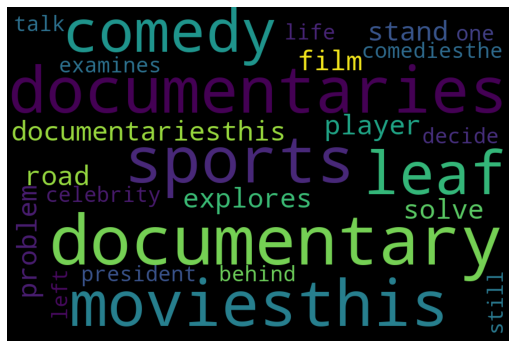

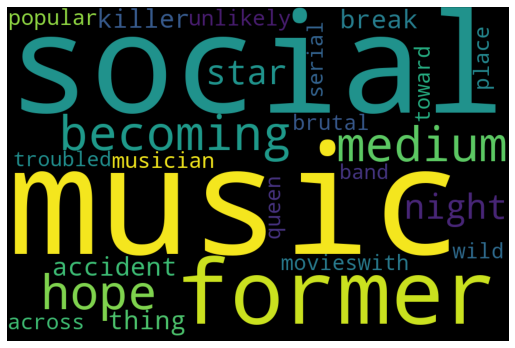

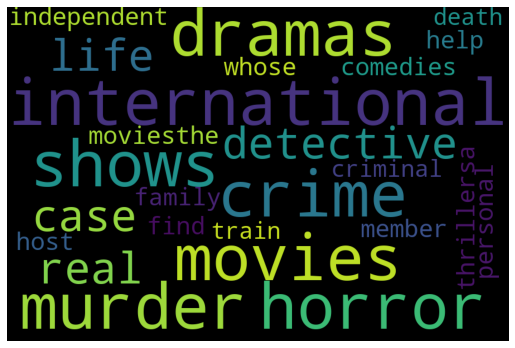

In [80]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:25]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]
  
  wordcloud = WordCloud(width=900, height=600).generate(imp_words_topic)
  plt.subplots(figsize=(10,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()
# topic 0

draw_word_cloud(4)
draw_word_cloud(3)
draw_word_cloud(7)

As we can see from the wordcloud that from two topics one is about documentries and other is about kids shows, therefore, topic modelling successfully classifies movies and shows into genre.

### **Word Cloud for Countries with the most content available**

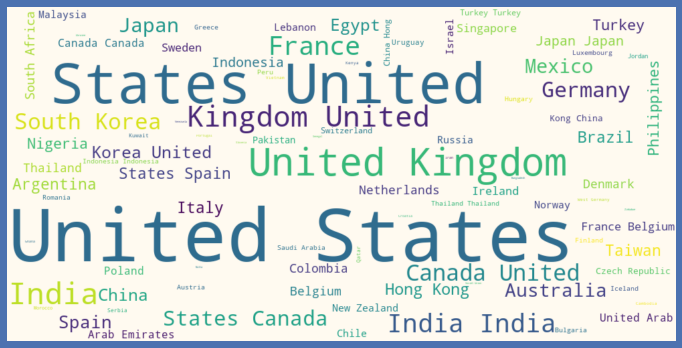

In [81]:
fig = plt.figure(figsize=(10,5),facecolor = 'b',edgecolor = 'r')
wordcloud = WordCloud(background_color='floralwhite',width=1000, height=500 ).generate(" ".join(Flix_df.country))
plt.imshow(wordcloud,interpolation ='bilinear')
plt.axis('off')
plt.tight_layout()
plt.savefig('country.png')
plt.show()

### **Word Cloud for Cast**

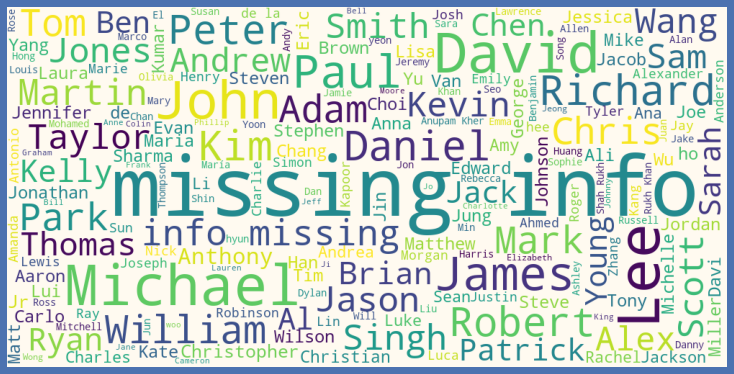

In [82]:
text = Flix_df['cast']
wordcloud = WordCloud(width = 1000,height = 500,background_color = 'floralwhite').generate(" ".join(Flix_df.cast))
fig = plt.figure(figsize = (10, 5),facecolor = 'b',edgecolor = 'k',)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# **Netflix Content for different age groups in top 10 countries**

In [83]:
Flix_df['principal_country'] = Flix_df['country'].apply(lambda x: x.split(",")[0])
Flix_df['principal_country'].head()

country_order = Flix_df['principal_country'].value_counts()[:11].index
content_data = Flix_df[['type', 'principal_country']].groupby('principal_country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

In [84]:
# Creating new column for age rating
rating_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Young Adults',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
Flix_df['age_rating'] = Flix_df['rating'].replace(rating_ages)
Flix_df['age_rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

## **CorrelationHeatmap**

In [85]:
Flix_df['count'] = 1
data = Flix_df.groupby('principal_country')[['principal_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['principal_country']

Flix_df_heatmap = Flix_df.loc[Flix_df['principal_country'].isin(data)]
Flix_df_heatmap = pd.crosstab(Flix_df_heatmap['principal_country'], Flix_df_heatmap['age_rating'],normalize = "index").T
Flix_df_heatmap

principal_country,Australia,Canada,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
age_rating,,,,,,,,,,
Adults,0.495327,0.467181,0.627551,0.259414,0.368644,0.764228,0.463918,0.797619,0.526042,0.463790
Kids,0.130841,0.150579,0.086735,0.015690,0.008475,0.016260,0.046392,0.035714,0.078125,0.088974
Older Kids,0.214953,0.220077,0.112245,0.163180,0.275424,0.089431,0.123711,0.053571,0.184028,0.201892
Teens,0.028037,0.027027,0.030612,0.004184,0.012712,0.016260,0.000000,0.017857,0.071181,0.084540
Young Adults,0.130841,0.135135,0.142857,0.557531,0.334746,0.113821,0.365979,0.095238,0.140625,0.160804


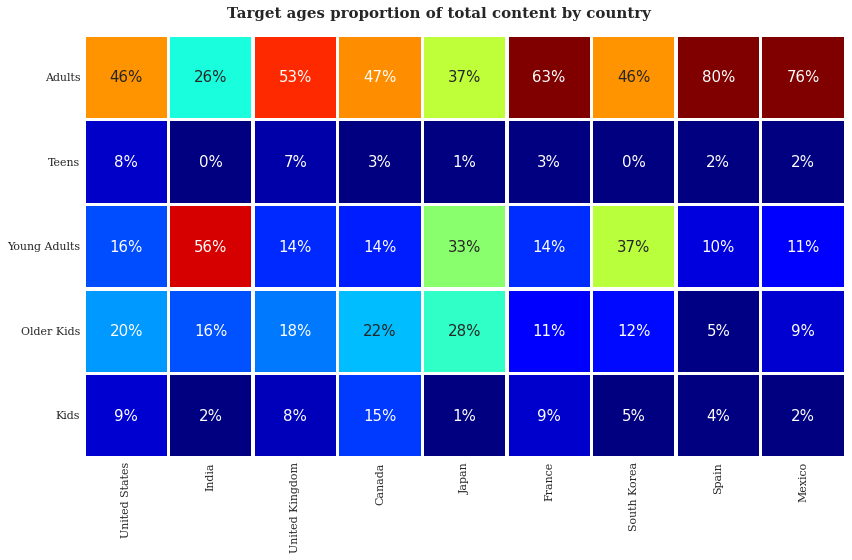

In [86]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids']

sns.heatmap(Flix_df_heatmap.loc[age_order,country_order2],cmap="jet",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='2.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":15})

ax.spines['top'].set_visible(True)

fig.text(.76,.765, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

**Observations:**
1. It is also interesting to see parallels between culturally comparable nations - the US and UK are closely aligned with their Netflix target ages, but radically different from, example, India or Japan!

2. Also, Mexico and Spain have similar content on Netflix for different age groups.

# **Clustering**

**Scaling the data**

In [87]:
# transform the data using StandardScaler
Flix_df_standarized = pd.DataFrame(StandardScaler().fit_transform(new_flix_df),columns = new_flix_df.columns)

#Perform a PCA to visualize clusters
pca = PCA(n_components = 2)
Flix_df_pca=pd.DataFrame(pca.fit_transform(Flix_df_standarized))

In [88]:
Flix_df_standarized.head()

,type,country,release_year,rating,duration,listed_in,year_added,month_added
0,1.496802,-2.041651,0.692231,0.492155,-1.280313,1.084506,1.085420,0.338631
1,-0.668091,-0.505346,0.235617,0.492155,0.467228,0.381066,-1.796311,1.452410
2,-0.668091,-0.099853,-0.335151,-1.052434,0.172698,0.588901,-0.355446,1.452410
3,-0.668091,0.871046,-0.563458,-1.567297,0.211969,-1.713266,-1.075878,1.173965
4,-0.668091,0.871046,-0.677611,-1.567297,1.056286,0.253168,1.085420,-1.610483


# **Clusters Model Implementation**
1. ***Affinity Propagation***
2. ***Agglomerative Clustering***
3. ***K-means Clustering***

# **1. Affinity Propagation**

> Indented block



In [89]:
af = AffinityPropagation(preference = -753, damping = 0.60, verbose = True, random_state = 0).fit(Flix_df_standarized) #Using euclidean distance as affinity estimator
#af = AffinityPropagation(damping=0.97,affinity='euclidean',verbose=True).fit(netflix) #Using euclidean distance
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print('Silhouette Coefficient: %0.3f' % metrics.silhouette_score(Flix_df_standarized, labels, metric = 'sqeuclidean'))

Converged after 81 iterations.
Estimated number of clusters: 13
Silhouette Coefficient: 0.244


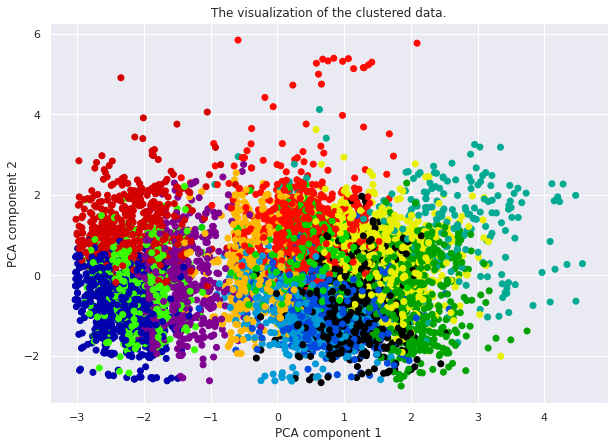

In [90]:
colors = cm.nipy_spectral(labels.astype(float) / n_clusters_)
#ax = plt.gca()
fig_dims = (10,7)
fig, ax = plt.subplots(figsize = fig_dims) 
plt.scatter(Flix_df_pca[0], Flix_df_pca[1], c = colors)
ax.set_title('The visualization of the clustered data.')
ax.set_xlabel('PCA component 1')
ax.set_ylabel('PCA component 2');

In [91]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(Flix_df_standarized, labels, metric='sqeuclidean'))

Silhouette Coefficient: 0.244


Silhouette Coefficient score is **0.244** which is not that well. so we will try some diffrent clustering models.

# **2. Agglomerative Clustering**

In [92]:
# lets start with programimg
def silhouette_analysis(X, X_pca, range_n_clusters):
    
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 10)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = AgglomerativeClustering(n_clusters = n_clusters,
                                   affinity = 'euclidean',
                                   linkage = 'ward')
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print('For n_clusters =', n_clusters,
              'The average silhouette_score is :', silhouette_avg)

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 15
        for i in range(n_clusters):
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.5, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10
        ax1.set_title('The silhouette plot for the various clusters.')
        ax1.set_xlabel('The silhouette coefficient values')
        ax1.set_ylabel('Clusters')

        ax1.axvline(x=silhouette_avg, color = 'cyan', linestyle= '--')

        ax1.set_yticks([])  
        ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X_pca[0], X_pca[1], c=colors)
    
        ax2.set_title('The visualization of the clustered data.')
        ax2.set_xlabel('PCA component 1')
        ax2.set_ylabel('PCA component 2')

        plt.suptitle(('\nSilhouette analysis for Agglomerative clustering '
                      'with n_clusters = %d' % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

### **Assume we cut vertical lines with a horizontal line to obtain the number of clusters.**
**Number of clusters = 4**

For n_clusters = 4 The average silhouette_score is : 0.17296314851287742


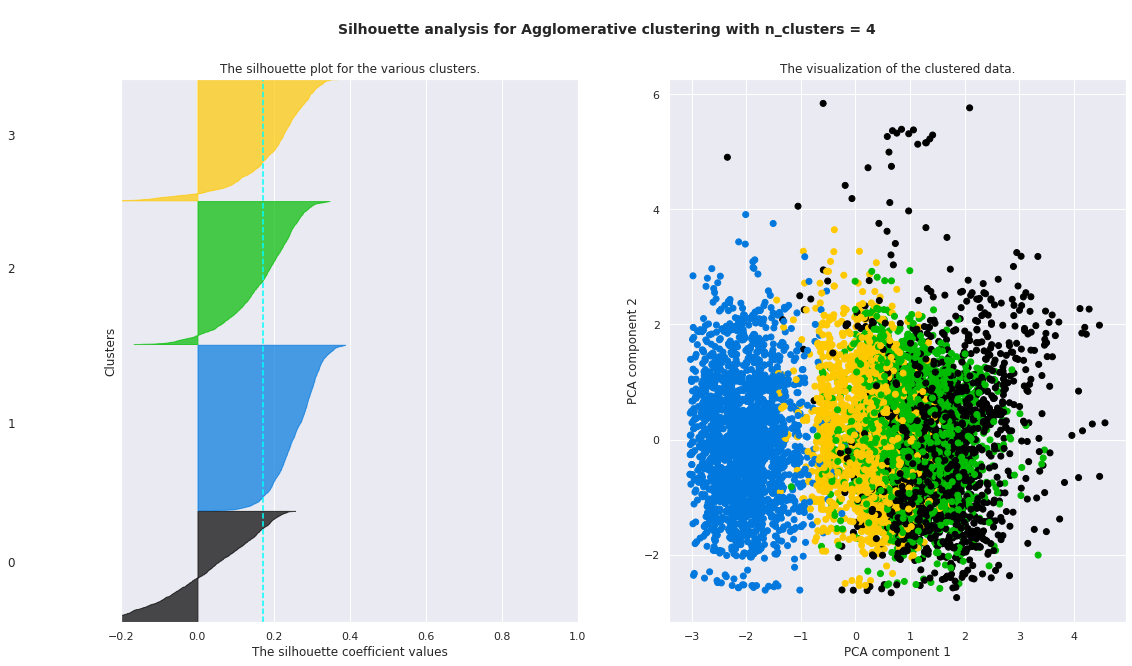

In [93]:
silhouette_analysis(np.array(Flix_df_standarized),Flix_df_pca,[4])

# **3. K-MEANS clustering**

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


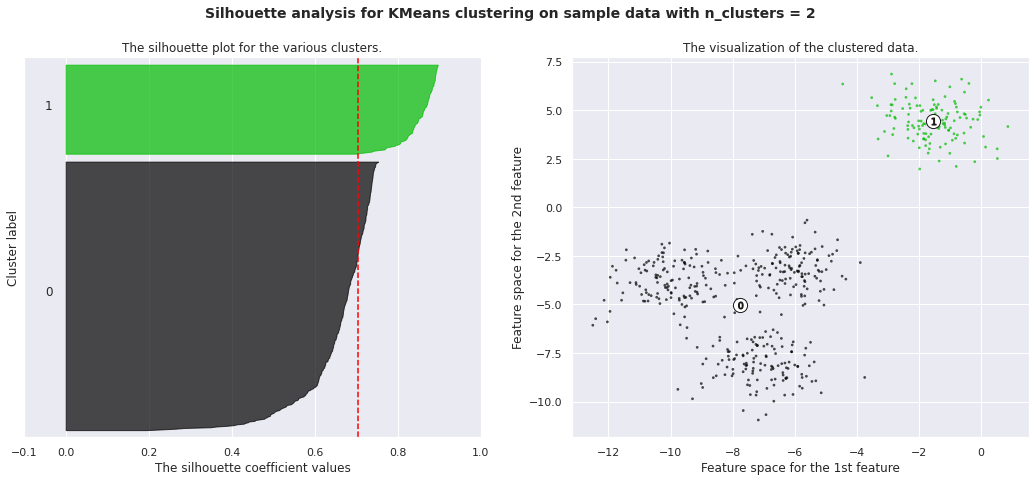

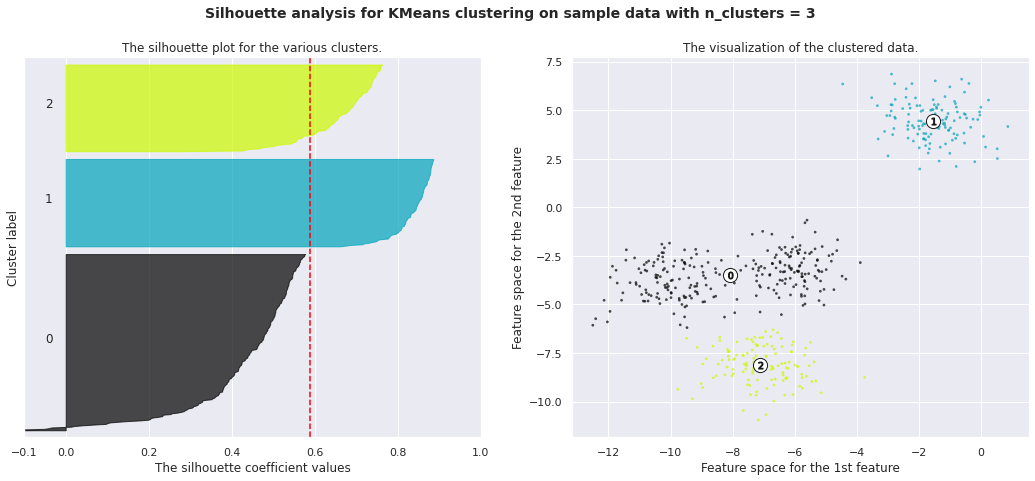

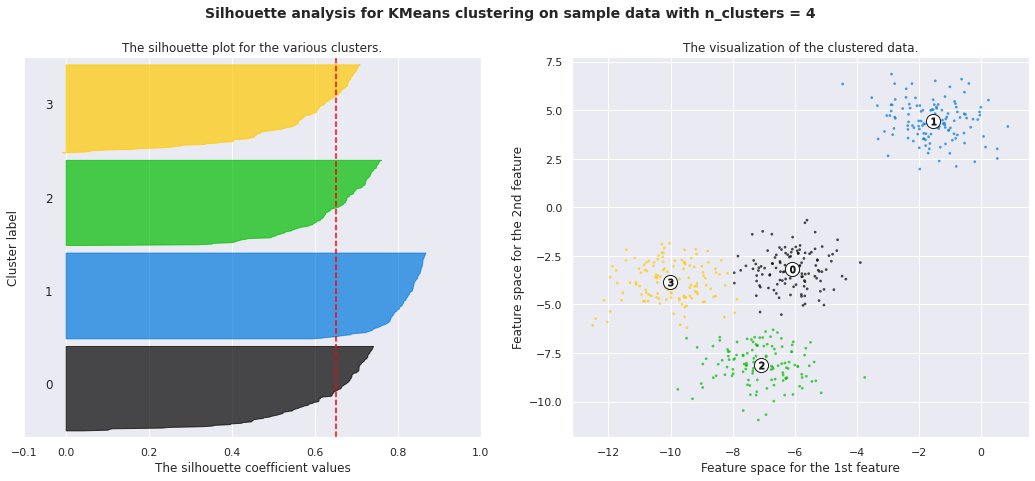

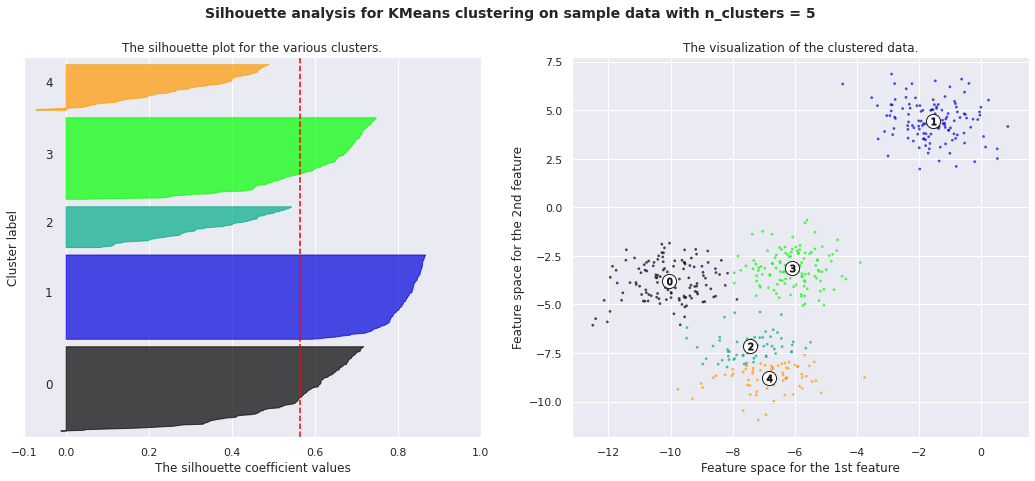

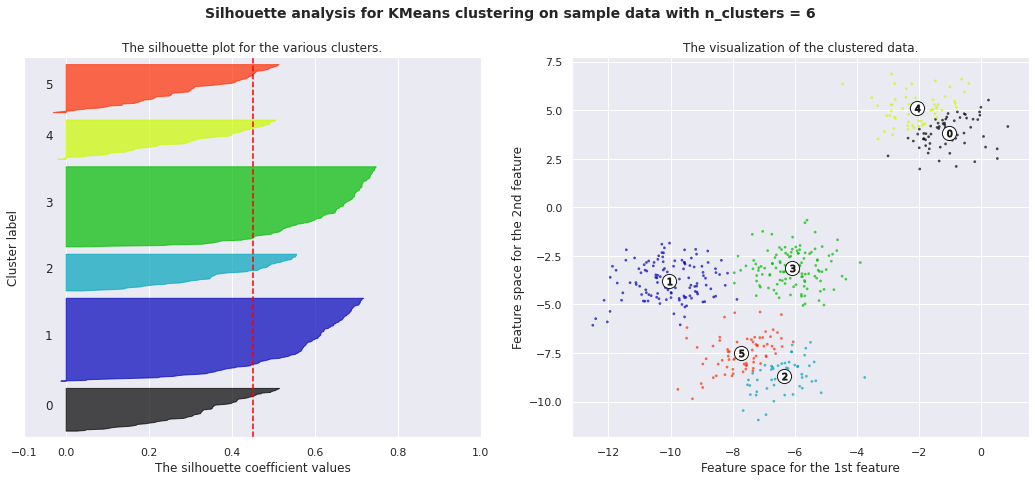

In [94]:
# Generating the sample data from make_blobs
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)              #  For reproducibility

range_n_clusters = [2, 3, 4, 5,6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Here is the Silhouette analysis done on the above plots to select an optimal value for n_clusters.

The value of 4 and 5 for n_clusters looks to be the optimal one. The silhouette score for each cluster is above average silhouette scores.

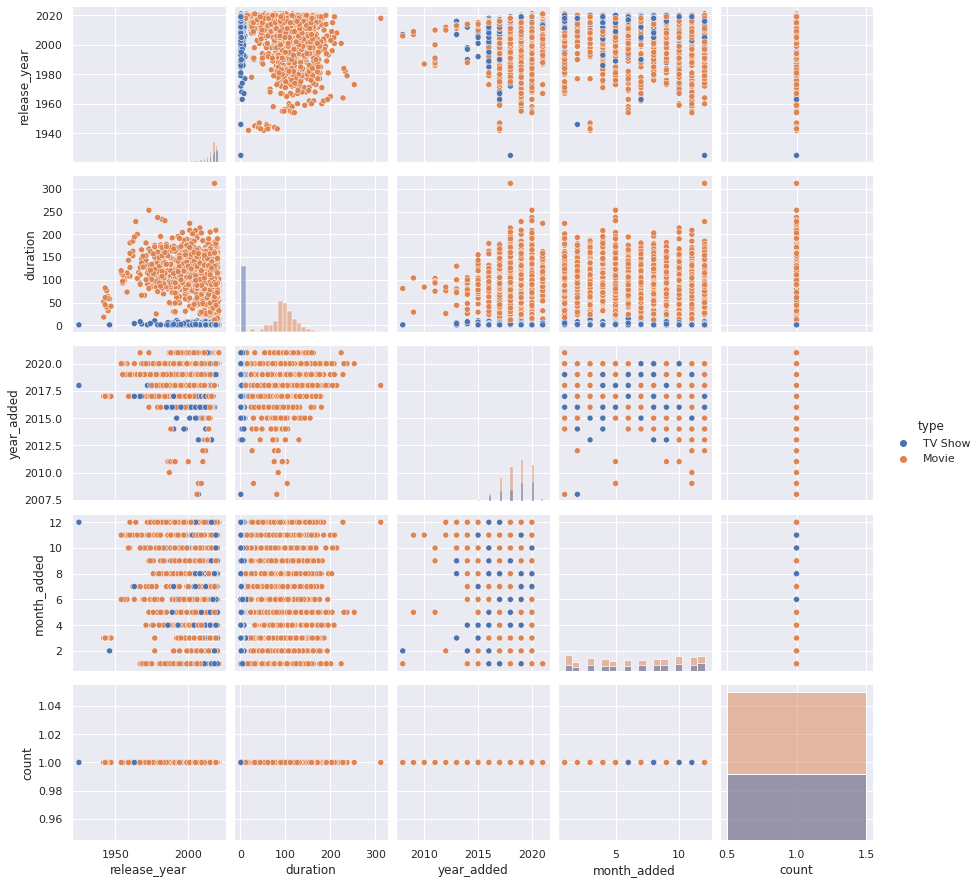

In [95]:
# MODEL INTERPRETATION
# We try to gain new knowledge using the previous clustering
sns_plot=sns.pairplot(Flix_df, hue="type", diag_kind="hist") #All features against each other
kmeans = KMeans(n_clusters = 4,random_state=42)
kmeans.fit(Flix_df_standarized)
Flix_df['cluster'] = kmeans.labels_

In [96]:
# from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc = scaler.fit_transform(new_flix_df)
Netflix = pd.DataFrame(sc, columns=list(new_flix_df.columns))
X = Netflix
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(Netflix).score(Netflix) for i in range(len(kmeans))]

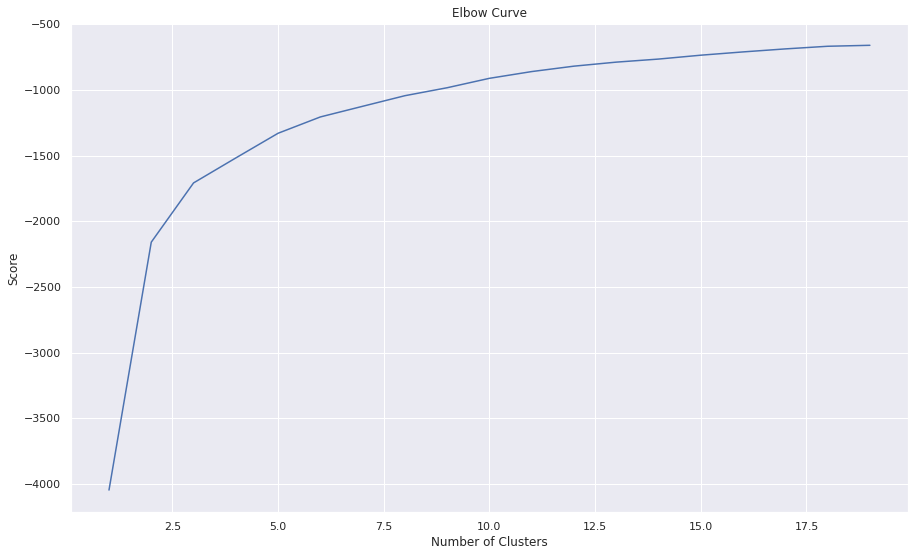

In [97]:
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [98]:
#fitting
kmeans = KMeans(n_clusters=5)
kmeans.fit(Netflix)

KMeans(n_clusters=5)

In [99]:
len(kmeans.labels_)
Netflix['cluster'] = kmeans.labels_
netflix.head()

,type,title,director,cast,country,rating,listed_in,description
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,PG-13,Dramas,A brilliant group of students become card-coun...


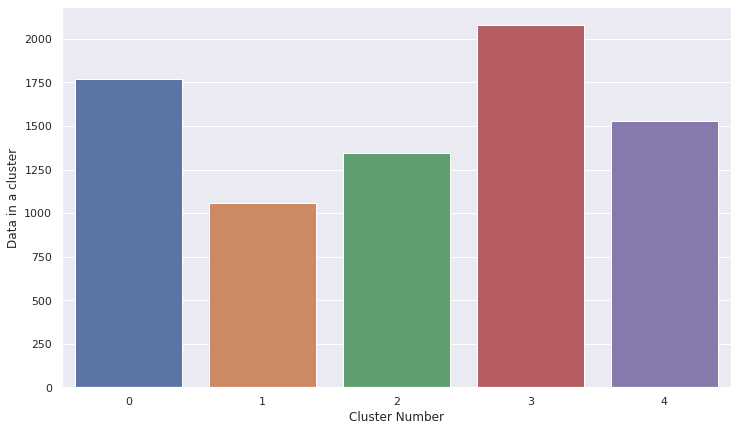

In [100]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1),y=Netflix.groupby(['cluster']).count()['type'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Data in a cluster")

We clearly see that one cluster is the largest and one cluster has the fewest number of movies.

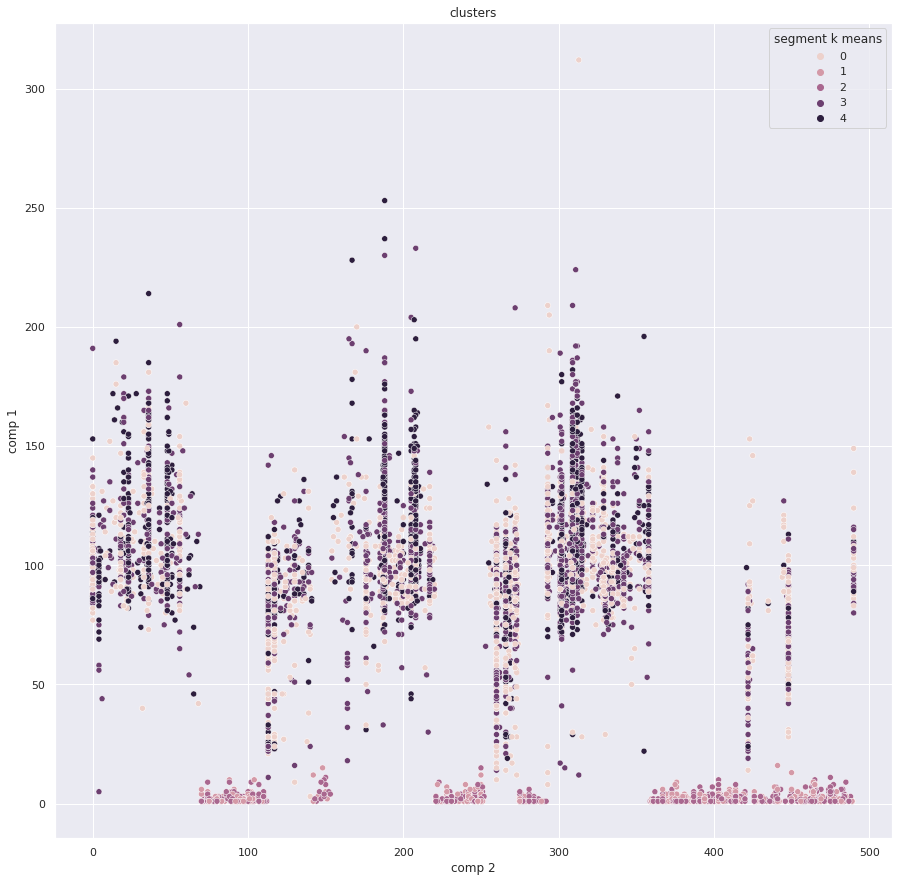

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   type             7777 non-null   int64  
 1   country          7777 non-null   int64  
 2   release_year     7777 non-null   int64  
 3   rating           7777 non-null   int64  
 4   comp 1           7777 non-null   int64  
 5   comp 2           7777 non-null   int64  
 6   comp 3           7777 non-null   int64  
 7   comp 4           7777 non-null   int64  
 8   comp 5           19 non-null     float64
 9   segment k means  7777 non-null   int32  
dtypes: float64(1), int32(1), int64(8)
memory usage: 638.0 KB


In [101]:
df = pd.concat([new_flix_df,pd.DataFrame(score)],axis=1)
df.columns.values[-5:]=['comp 1','comp 2','comp 3','comp 4','comp 5']
df['segment k means'] = kmeans.labels_

#df = df.set_index(df['show_id'])
#f_mm.head()

x_axis = df['comp 2']
y_axis = df['comp 1']
plt.figure(figsize=(15,15))
sns.scatterplot(x_axis,y_axis,hue=df['segment k means'])
plt.title('clusters')
plt.show()

df.info()


# **Conclusion :**

**1.** Most films were released in the years 2018, 2019, and 2020.

**2.** The months of October, November, December and January had the largest number of films and television series released.

1. We started by removing nan values and converting the Netflix added date to year, month, and day using date time format.

2. The second thing we did was feature engineering, which involved removing certain variables and preparing a dataframe to feed the clustering algorithms.

3. For the clustering algorithm, we utilised type, director, nation, released year, genre, and year.

4. Affinity Propagation and K-means Clustering were utilised to build the model.

5. In Affinity Propagation, we had 9 clusters and a Silhouette Coefficient score of 0.244.

6. The final model we used was k-means clustering, which consisted of 2,3,4,5,6 clusters.
Score of silhoutte in k-measn clustering :

n_clusters = 2 The average silhouette_score is : 07049787496083262

n_clusters = 3 The average silhouette_score is : 05882004012129721

n_clusters = 4 The average silhouette_score is : 06505186632729437

n_clusters = 5 The average silhouette_score is : 0.56376469026194

n_clusters = 6 The average silhouette_score is : 04504666294372765

8. After clustering, we can say that our alternative hypotheses is number of TV shows launched in the previous few years is NOT growing.

9. Our second alternative hypotheses is number of TV shows added to Netflix is higher

1. LDA and LSA has sorted much more similar titles in a group of genre

2. Recommendation system works perfectly well with description column

3. After applying K - means optimal value of number of clusters is 5

4. Silhouette score for a set of sample data points is used to measure how dense and well-separated the clusters are.

1)There are about 70% movies and 30% TV shows on Netflix.

2)Data set contains 7787 rows and 12 columns in that cast and director features contains large number of missing values so we can drop it and we have 10 features for the further implementation

3)The United States has the highest number of content on Netflix by a huge margin followed by India.

4)Raul Campos and Jan Sulter collectively have directed the most content on Netflix.

5)Anupam Kher has acted in the highest number of films on Netflix. Drama is the most popular genre followed by comedy.

6)More of the content is released in holiday season - October, November, December and January.

7)The number of releases have significantly increased after 2015 and have dropped in 2021 because of Covid 19.

8)By applying the silhouette score method for n range clusters on dataset we got best score which is 0.348 for 3 clusters it means content explained well on their own clusters, by using elbow method after k = 3 curve gets linear it means k = 3 will be the best cluster

9)Applied different clustering models Kmeans, hierarchical, Agglomerative clustering on data we got the best cluster arrangments

10)By applying different clustering algorithms to our dataset .we get the optimal number of cluster is equal to 3